## Training Neural Networks

In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

In [6]:
# define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), 
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), 
                               ])
# download and load training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

In [7]:
# build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128), 
                     nn.ReLU(), 
                     nn.Linear(128, 64), 
                     nn.ReLU(),
                     nn.Linear(64, 10))

# define the loss
criterion = nn.CrossEntropyLoss()

# get the data
images, labels = next(iter(trainloader))
# flatten the images
images = images.view(images.shape[0], -1)

# forward pass
logits = model(images)
# calculate the loss
loss = criterion(logits, labels)

print(loss)

tensor(2.3131, grad_fn=<NllLossBackward>)


In [8]:
# build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128), 
                     nn.ReLU(), 
                     nn.Linear(128, 64), 
                     nn.ReLU(), 
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim = 1))

# define the loss
criterion = nn.NLLLoss()

# get the data
images, labels = next(iter(trainloader))
# flatten the images
images = images.view(images.shape[0], -1)

# forward pass and get logprobabilities
logps = model(images)
# calculate the loss
loss = criterion(logps, labels)

print(loss)

tensor(2.3073, grad_fn=<NllLossBackward>)


In [9]:
xx = torch.randn(2, 2)
x = torch.randn(2, 2, requires_grad = True)

print(xx)
print(x)

tensor([[ 0.1647,  0.2271],
        [ 0.8595, -1.1904]])
tensor([[-0.1342,  0.6692],
        [-0.9623,  0.5996]], requires_grad=True)


In [10]:
yy = xx**2
y = x**2

print(yy)
print(y)

tensor([[0.0271, 0.0516],
        [0.7387, 1.4171]])
tensor([[0.0180, 0.4478],
        [0.9260, 0.3595]], grad_fn=<PowBackward0>)


In [12]:
print(yy.grad_fn)
print(y.grad_fn)

None


In [13]:
zz = yy.mean()
z = y.mean()
print(zz)
print(z)

tensor(0.5586)
tensor(0.4378, grad_fn=<MeanBackward1>)


In [14]:
print(xx.grad)
print(x.grad)

None
None


In [16]:
# zz.backward()
z.backward()
print(xx.grad)
print(x.grad)
print(xx/2)
print(x/2)

None
tensor([[-0.0671,  0.3346],
        [-0.4811,  0.2998]])
tensor([[ 0.0823,  0.1135],
        [ 0.4297, -0.5952]])
tensor([[-0.0671,  0.3346],
        [-0.4811,  0.2998]], grad_fn=<DivBackward0>)


In [19]:
# build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128), 
                     nn.ReLU(), 
                     nn.Linear(128, 64), 
                     nn.ReLU(), 
                     nn.Linear(64, 10), 
                     nn.LogSoftmax(dim = 1))

# define the loss
criterion = nn.NLLLoss()

# get the data
images, labels = next(iter(trainloader))
# flatten the data
images = images.view(images.shape[0], -1)

# forward pass
logps = model(images)
# calculate the loss
loss = criterion(logps, labels)

In [20]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0012, -0.0012, -0.0012,  ..., -0.0012, -0.0012, -0.0012],
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        [ 0.0037,  0.0037,  0.0037,  ...,  0.0037,  0.0037,  0.0037],
        ...,
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        [-0.0027, -0.0027, -0.0027,  ..., -0.0027, -0.0027, -0.0027],
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005]])


In [21]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [23]:
print('Initial weights - ', model[0].weight)

# get the data
images, labels = next(iter(trainloader))
# flatten the data
images.resize_(64, 784)

# forward pass
output = model(images)
# calculate the loss
loss = criterion(output, labels)
loss.backward()

print('Gradient - ', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0136,  0.0310, -0.0298,  ..., -0.0051, -0.0008, -0.0255],
        [-0.0147, -0.0207, -0.0131,  ...,  0.0202,  0.0128, -0.0019],
        [-0.0066, -0.0076,  0.0034,  ...,  0.0186,  0.0297,  0.0330],
        ...,
        [ 0.0245,  0.0090,  0.0287,  ...,  0.0130,  0.0030, -0.0181],
        [-0.0320, -0.0251, -0.0122,  ..., -0.0138,  0.0108,  0.0227],
        [ 0.0198,  0.0339,  0.0054,  ..., -0.0203,  0.0122,  0.0105]],
       requires_grad=True)
Gradient -  tensor([[-0.0012, -0.0012, -0.0012,  ..., -0.0012, -0.0012, -0.0012],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [ 0.0041,  0.0041,  0.0041,  ...,  0.0041,  0.0041,  0.0041],
        ...,
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        [-0.0061, -0.0061, -0.0061,  ..., -0.0061, -0.0061, -0.0061],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004]])


In [24]:
optimizer.step()
print('Updated weights -', model[0].weight)

Updated weights - Parameter containing:
tensor([[-0.0136,  0.0310, -0.0298,  ..., -0.0051, -0.0008, -0.0255],
        [-0.0147, -0.0207, -0.0131,  ...,  0.0202,  0.0128, -0.0019],
        [-0.0066, -0.0076,  0.0034,  ...,  0.0186,  0.0297,  0.0329],
        ...,
        [ 0.0245,  0.0090,  0.0287,  ...,  0.0130,  0.0030, -0.0180],
        [-0.0320, -0.0250, -0.0121,  ..., -0.0138,  0.0109,  0.0228],
        [ 0.0198,  0.0339,  0.0054,  ..., -0.0203,  0.0122,  0.0105]],
       requires_grad=True)


## Train for real

In [25]:
model = nn.Sequential(nn.Linear(784, 128), 
                     nn.ReLU(), 
                     nn.Linear(128, 64), 
                     nn.ReLU(), 
                     nn.Linear(64, 10), 
                     nn.LogSoftmax(dim = 1))

# define the loss
criterion = nn.NLLLoss()

# define optimizer
optimizer = optim.SGD(model.parameters(), lr = 0.003)

# training loop
epoch = 5
for e in range(epoch):
    running_loss = 0
    for images, labels in trainloader:
        # flatten the data
        images = images.view(images.shape[0], -1)
        
        # training pass
        optimizer.zero_grad()
        
        # forward pass
        output = model(images)
        # calculate the loss
        loss = criterion(output, labels)
        # backpropagation
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        print(f"training loss: {running_loss/len(trainloader)}")
        

training loss: 1.953781380963478
training loss: 0.9151444153300227
training loss: 0.5446299311003959
training loss: 0.43614057362524433
training loss: 0.3871076988862522


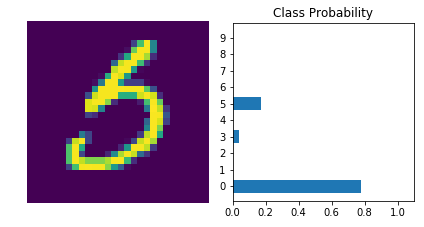

In [26]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)

with torch.no_grad():
    logps = model(img)
    
ps = torch.exp(logps)

helper.view_classify(img.view(1, 28, 28), ps)